In [1]:
import os
os.system("mkdir ../data/")
os.system("mkdir ../outputs/")
os.system("mkdir ../outputs/figures/")
os.system("mkdir ../outputs/skills/")

256

In [1]:
# Code to convert any day / radar to ".pickle" file for processing
from pickle_creator import to_pickle_files
import datetime as dt
rads = ["bks"]
dates = [dt.datetime(2010, 1, 15)]
to_pickle_files(dates, rads)

date, rad:  2010-01-15 00:00:00 bks
Read file -  /sd-data/2010/fitacf/bks/20100114.2332.16.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.0000.11.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.0201.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.0401.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.0601.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.0801.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.1001.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.1201.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.1401.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.1601.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.1801.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.2001.00.bks.fitacf.bz2
Read file -  /sd-data/2010/fitacf/bks/20100115.2201.00.bks.fitacf.bz2

 Started converting to beam data.


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/get_sd_data.py:117: RuntimeWarning: invalid value encountered in add
  if len(self.v) > 0 and len(self.w_l) > 0: self.gsflg[2] = ((np.abs(self.v) - 0.139*self.w_l + 0.00113*self.w_l**2) < 33.1).astype(int)



 Converted to beam data.

 Started converting to scan data.

 Converted to scan data.


In [1]:
# Run analysis and create RTI plots
from statistics import run_algorithm
import datetime as dt
rad = "bks"
date = dt.datetime(2010, 1, 15)
a_name="dbscan"
run_algorithm(rad, date, date+dt.timedelta(days=1), a_name, gmm=False, 
              parameters = ['gate', 'beam', 'vel', 'wid', 'time', 'trad_gsflg', 'pow', 'clust_flg'],
              isgs={"thresh":[0.5,0.6], "pth":0.5}, plot_beams=[7], 
              plot_params=["vel", "wid", "pow", "cluster", "isgs", "cum_isgs"], save=True)

DBSCAN clusters: 1321

 Estimated Skills.
 Calinski Harabasz Score -  33.78162333584243
 Ball-Hall Score -  12890793.66618802
 Hartigan Score -  -2.239967444509483
 Xu Score -  2.8114801958225737
 Estimation done.


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/utils.py:173: RuntimeWarning: overflow encountered in exp
  if self.case == 0: f = 1/(1+np.exp(np.abs(v)+w/3-30))
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:718: RuntimeWarning: divide by zero encountered in double_scalars
  fac = xbar * (1 - xbar) / data.var(ddof=0) - 1
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:558: RuntimeWarning: invalid value encountered in double_scalars
  func = [s1 - n * (-psiab + sc.psi(a)),
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:559: RuntimeWarning: invalid value encountered in double_scalars
  s2 - n * (-psiab + sc.psi(b))]
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:672: RuntimeWarning: Mean of empty slice.
  xbar = data.mean()
/opt/tljh/user/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double

/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotParamDF[xparam] = plotParamDF[xparam].tolist()
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/utils.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotParamDF[yparam] = plotParamDF[yparam].tolist()
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:62: MatplotlibDeprecationWarning: shading='flat' when X a

/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["labels"]=np.where(df["labels"]==j, i, df["labels"])
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["labels"]=np.where(df["labels"]==j, i, df["labels"])
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:74: SettingWithCopyWarning: 
A value is tryin

/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotParamDF[xparam] = plotParamDF[xparam].tolist()
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/utils.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotParamDF[yparam] = plotParamDF[yparam].tolist()
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:148: MatplotlibDeprecationWarning: shading='flat' when X 

 Lines: [-4.265336   -3.38373919 -2.60009759 -1.42463519  1.31811042  2.59152803
  3.37516963  4.45267684]
 Lines: [-3.0279428  -1.49989807  2.04238742  2.7369532 ]
 Lines: [-8.91200328  2.90143704 20.62159753 27.11898971 33.61638188 38.93243003
 44.24847817]


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:300: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"-$10^4$", r"-$10^2$", r"$10^0$", r"$10^2$", r"$10^4$"])
/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:315: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"-$10^2$", r"-$10^0$", r"$10^2$", r"$10^4$"])


 Lines: [-4.53605641 -3.71126782 -2.68028207 -1.54619776  1.13436518  2.6808438
  3.91802669  4.84591386]


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:300: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"-$10^4$", r"-$10^2$", r"$10^0$", r"$10^2$", r"$10^4$"])


 Lines: [-4.0022352  -3.21895457 -1.1302062   1.7418228   2.87322817  4.00463354]
 Lines: [-3.5065013   5.33007213 44.21099524 48.33472951]


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:315: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"-$10^2$", r"-$10^0$", r"$10^2$", r"$10^4$"])


 Lines: [-4.97453455 -4.19139414 -3.40825374 -2.62511333 -0.72320091  0.7312027
  2.63311512  4.31127313  5.09441354]


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:300: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"-$10^4$", r"-$10^2$", r"$10^0$", r"$10^2$", r"$10^4$"])


 Lines: [-4.23175658 -3.28368457  1.03531013  2.61543014  3.98486749  4.82759816]


/home/jupyter-shibaji_chakrobart-968f7/clustering_superdarn_data/analysis/plotlib.py:315: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"-$10^2$", r"-$10^0$", r"$10^2$", r"$10^4$"])


 Lines: [ 7.59800694 52.42666013 58.71840093 65.01014173]


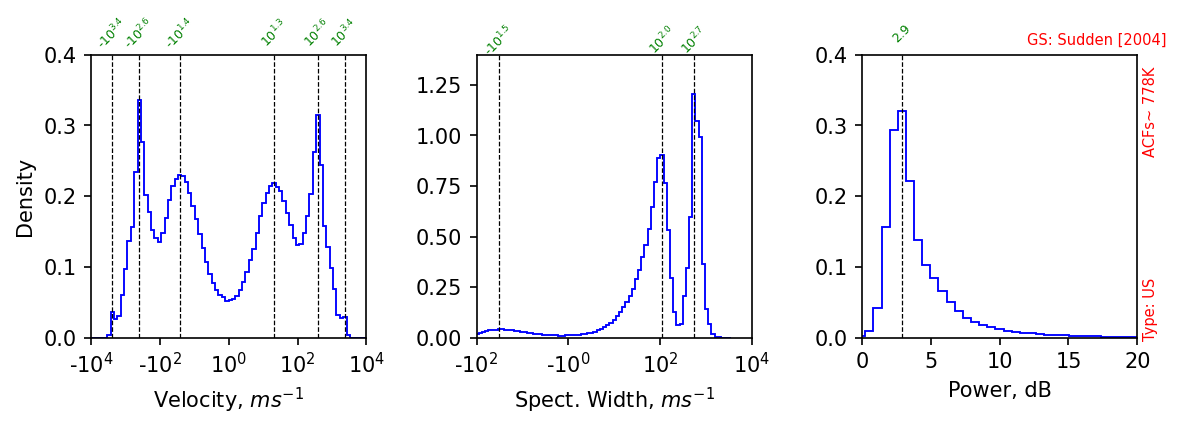

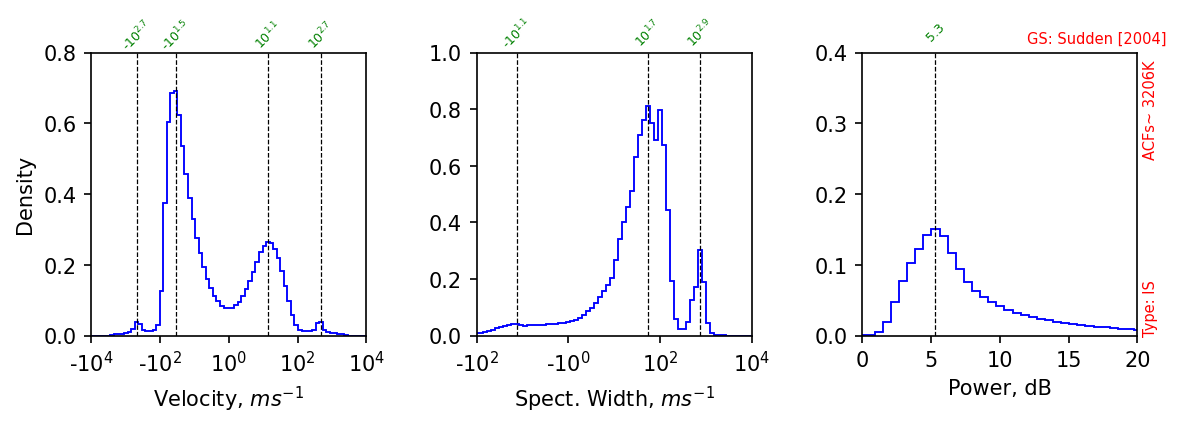

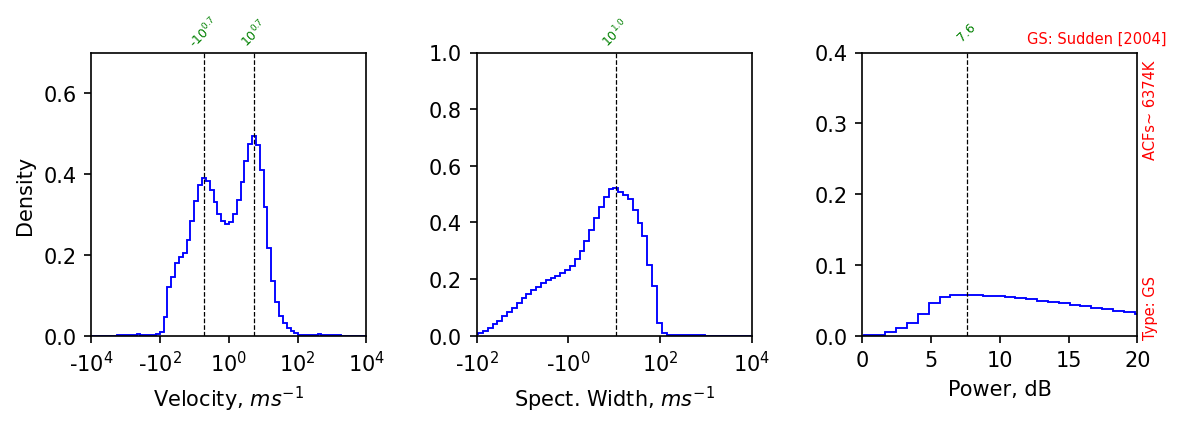

In [2]:
import plotlib
import datetime as dt
plotlib.histograms_skill_scores(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=True)
plotlib.histograms_scatters(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=False)
plotlib.histograms_scatters(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=False, sctr=0,
                           fp_details={
                           "v": {"dist": 7, "ids":[2,3,4,5], "bins":100, "ylim":[0,0.8], "rot":45, "dh":0.05, "log":True},
                           "w_l": {"dist": 7, "ids":[2,3,4], "bins":100, "ylim":[0,1], "rot":45, "dh":0.07, "log":True},
                           "p": {"dist": 7, "ids":[1], "bins":100, "ylim":[0,0.4], "rot":45, "dh":0.03, "log":False}
                       })
plotlib.histograms_scatters(["bks"], "dbscan", [dt.datetime(2010,1,1)], [dt.datetime(2010,1,31)], gmm=False, sctr=1,
                           fp_details={
                           "v": {"dist": 7, "ids":[4,5], "bins":100, "ylim":[0,0.7], "rot":45, "dh":0.05, "log":True},
                           "w_l": {"dist": 7, "ids":[2], "bins":100, "ylim":[0,1], "rot":45, "dh":0.07, "log":True},
                           "p": {"dist": 7, "ids":[0], "bins":100, "ylim":[0,0.4], "rot":45, "dh":0.03, "log":False}
                       })